# Bank Marketing

The data is related with direct marketing campaigns of a European banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# The Data

In [3]:
df = pd.read_csv('DSA Data Set.csv')

In [4]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,ModelPrediction,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.932750,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.953579,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.945724,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.933875,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.940996,no


# Exploratory Analysis

Finding null values

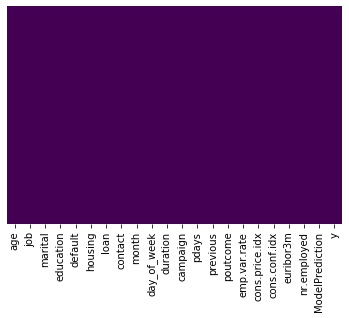

In [5]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis') #no null values

In [6]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,ModelPrediction
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.887597
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.125351
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.250174
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.857484
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.945879
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.959214
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,0.988360


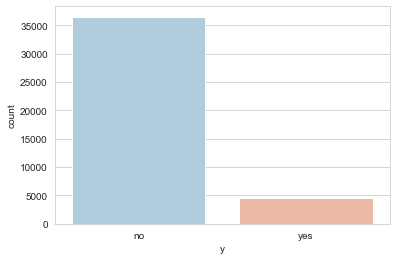

In [7]:
sns.set_style('whitegrid')
sns.countplot(x='y',data=df,palette='RdBu_r')

In [8]:
data=df.query('y == "yes"')

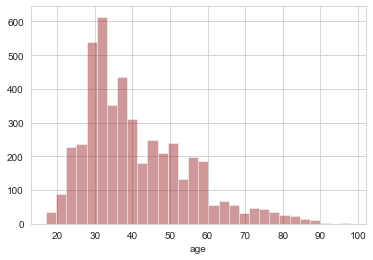

In [9]:
sns.distplot(data['age'].dropna(),kde=False,color='darkred',bins=30)

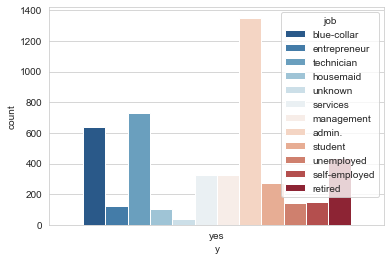

In [11]:
sns.countplot(x='y',hue='job',data=data,palette='RdBu_r')

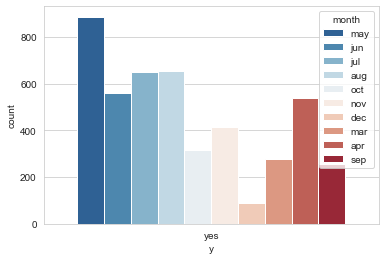

In [12]:
sns.countplot(x='y',hue='month',data=data,palette='RdBu_r')

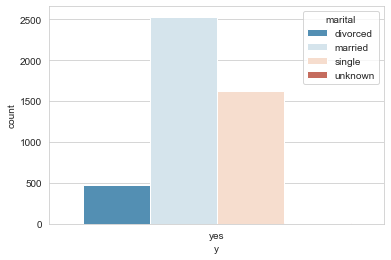

In [13]:
sns.countplot(x='y',hue='marital',data=data,palette='RdBu_r')

# Model Evaluation

In [14]:
df["y"].unique()

array(['no', 'yes'], dtype=object)

In [15]:
df["y"]=df["y"].replace({
    "no": 0,
    "yes": 1,
})

In [16]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,ModelPrediction,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.932750,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.953579,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.945724,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.933875,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.940996,0


# Converting ModelPrediction to 1 and 0

In [17]:
def Pred(cols):
    y = cols[0]
    ModelPrediction = cols[1]
    
    if ModelPrediction >= 0.5:
        return y
    
    elif ModelPrediction < 0.5 and y==0:
        return 1

    else:
        return 0

In [18]:
df['ModelPrediction'] = df[['y','ModelPrediction']].apply(Pred,axis=1)

In [19]:
df.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,ModelPrediction,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1.0,1
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0.0,0
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0.0,0
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1.0,1
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,0.0,0


In [27]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

print(confusion_matrix(df["y"],df["ModelPrediction"]))
print(classification_report(df["y"],df["ModelPrediction"]))

recall_score=recall_score(df["y"],df["ModelPrediction"])
precision_score=precision_score(df["y"],df["ModelPrediction"])
f1_score=f1_score(df["y"],df["ModelPrediction"])
print('recall_score: %.3f' % Recall_score)
print('precision_score: %.3f' % precision_score)
print('f1_score: %.3f' % f1_score)

[[36291   257]
 [  680  3960]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99     36548
           1       0.94      0.85      0.89      4640

    accuracy                           0.98     41188
   macro avg       0.96      0.92      0.94     41188
weighted avg       0.98      0.98      0.98     41188

recall_score: 0.853
precision_score: 0.939
f1_score: 0.894


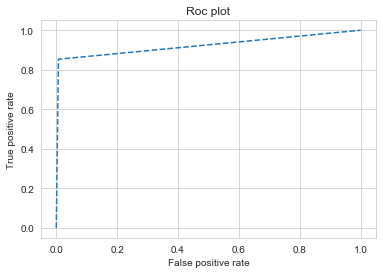

In [21]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(df["y"],df["ModelPrediction"])
plt.plot(fpr,tpr,linestyle='--')
plt.title('Roc plot')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()

In [22]:
print(roc_auc_score(df["y"],df["ModelPrediction"]) )

0.9232082136670529


In [23]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(df["y"],df["ModelPrediction"])

Text(0, 0.5, 'Recall')

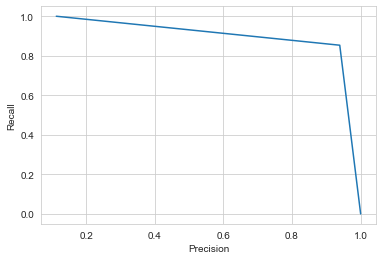

In [24]:
plt.plot(precision, recall, label="precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")